# Evidencia Students performance in exams

In [1]:
# pip install seaborn

In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
%ls evidencia_visualización_de_datos.csv

evidencia_visualización_de_datos.csv


In [4]:
df = pd.read_csv('evidencia_visualización_de_datos.csv')
df.head()

,gender,parental level of education,test preparation course,math score,reading score,writing score
0,female,bachelor's degree,none,72,72,74
1,female,some college,completed,69,90,88
2,female,master's degree,none,90,95,93
3,male,associate's degree,none,47,57,44
4,male,some college,none,76,78,75


## Descripción de variables

### Gender: femenino y masculino
### Parental level of education: nivel de escolaridad que alcanzaron los padres de los estudiantes
### Test preparation course: none (no se prepararon para el examen), completed(sí se prepararon para el examen)
### matht score, reading score, writing score: puntaje obtenido en los examenes

## Pregunta de investigación 1
### ¿Existe alguna correlacion entre 'math score' y 'readig score'?

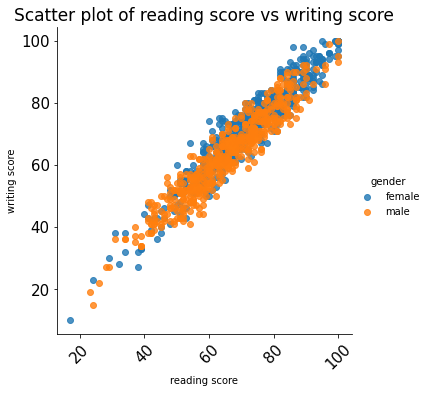

In [5]:
sns.lmplot (x = 'reading score', 
             y = 'writing score',
             data = df,
            fit_reg = False,
            hue = 'gender'
            )
plt.title('Scatter plot of reading score vs writing score', fontsize = 17)
plt.xticks(fontsize = 15, rotation = 45)
plt.yticks(fontsize = 15)
plt.show()

### se observa una correlación positiva muy fuerte, entre mayor calificación en reading 
### score, mayor calificación en writing score

In [6]:
df.columns

Index(['gender', 'parental level of education', 'test preparation course',
       'math score', 'reading score', 'writing score'],
      dtype='object')

## Pregunta de investigación 2
### ¿Que genero obtiene mejores resultados en los examenes?

Text(0.5, 1.0, 'Box plot de Genero Female')

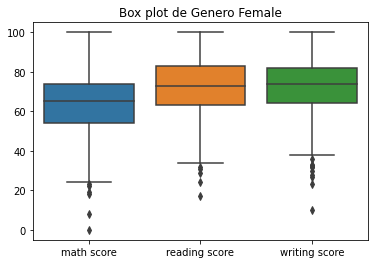

In [7]:
sns.boxplot(data = df.loc[df['gender'] == 'female', 
                          ['math score', 'reading score', 'writing score']],
           ).set_title('Box plot de Genero Female')

Text(0.5, 1.0, 'Box plot de Genero Male')

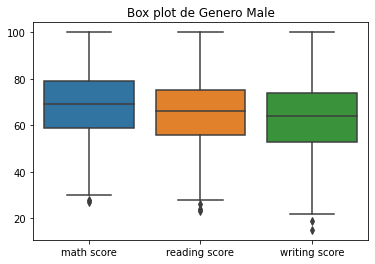

In [8]:
sns.boxplot(data = df.loc[df['gender'] == 'male', 
                          ['math score', 'reading score', 'writing score']],
           ).set_title('Box plot de Genero Male')

### se observa que en cuanto a 'reading score' y 'writing score', las mujeres tienen una mediana superior
### a los hombres, sin embargo, en cuanto a 'math score', los hombres obtienen una media superior

Text(0.5, 1.0, 'Histogram of total bill')

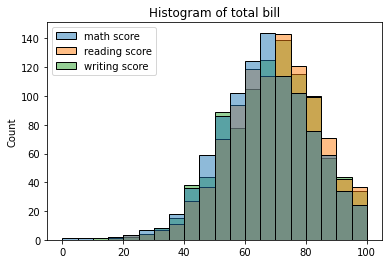

In [9]:
sns.histplot(df[['math score', 'reading score', 'writing score']],
             kde = False,
            bins = 20).set_title('Histogram of total bill')

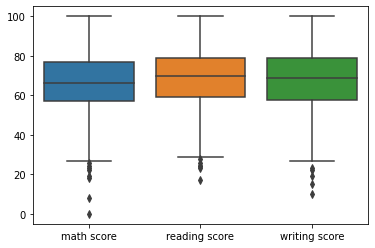

In [10]:
sns.boxplot(data = df.loc[:, ['math score', 'reading score', 'writing score']],
           )

## Pregunta de investigación 3
### ¿Que tanto impacta el parental level of education en la calificación 'math score' de los estudiantes de ambos generos?

In [11]:
df.columns

Index(['gender', 'parental level of education', 'test preparation course',
       'math score', 'reading score', 'writing score'],
      dtype='object')

In [12]:
df[['gender', 'parental level of education', 'math score']]

,gender,parental level of education,math score
0,female,bachelor's degree,72
1,female,some college,69
2,female,master's degree,90
3,male,associate's degree,47
4,male,some college,76
...,...,...,...
995,female,master's degree,88
996,male,high school,62
997,female,high school,59
998,female,some college,68


In [13]:
sns.histplot(df['parental level of education', 'math score'], kde = False, bins = 20).set_title('Bar chart of parental level of education vs math score')
plt.xticks(fontsize = 15, rotation = 45)
plt.yticks(fontsize = 15)
plt.show()

KeyError: ('parental level of education', 'math score')

In [ ]:
plot_parental = pd.pivot_table(df,
                           index = ['parental level of education'],
                           columns = ['gender'], 
                           values = ['reading score', 'writing score'], 
                           aggfunc = ['mean']
                          )
plot_parental